5. Supervised Learning Algorithms - Logistic Regression (Univariant): Implement logistic
regression and test it using any dataset. Give new test data and predict the classification
output. Print the confusion matrix, accuracy, precision, recall, MSE , RMSE etc. Analyze
and write the inference.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    mean_squared_error,
    ConfusionMatrixDisplay,
)

In [4]:
# 1. Load dataset and reduce to 1 feature (Univariate)
data = load_breast_cancer()
X = data.data[:, [0]]  # only 1 feature: mean radius
y = data.target  # binary classification (0: malignant, 1: benign)
df = pd.DataFrame(X,y)
df.head(-5)

,0
0,17.99
0,20.57
0,19.69
0,11.42
0,20.29
...,...
1,11.51
1,14.05
1,11.20
0,15.22


In [5]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 3. Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [7]:
# 4. Predict on test set
y_pred = model.predict(X_test)


In [8]:
# 5. Evaluate
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [9]:
# 6. Display evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


Confusion Matrix:
 [[36  7]
 [ 3 68]]
Accuracy: 0.9123
Precision: 0.9067
Recall: 0.9577
MSE: 0.0877
RMSE: 0.2962


In [10]:
# 7. Predict on new input
new_data = np.array([[14.0], [20.0]])  # Example mean radius values
new_pred = model.predict(new_data)
print(f"\nPredictions for new inputs {new_data.ravel()}: {new_pred}")



Predictions for new inputs [14. 20.]: [1 0]


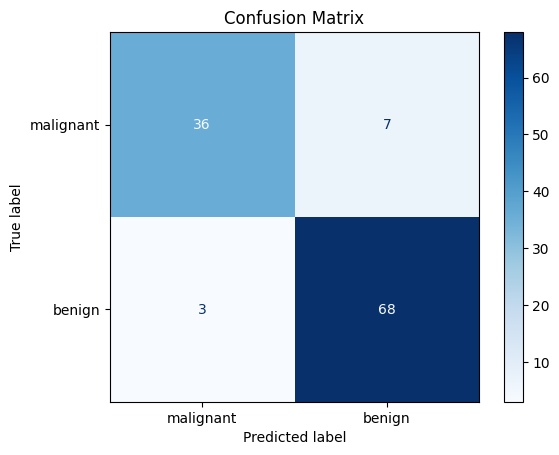

In [11]:
# 8. Confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


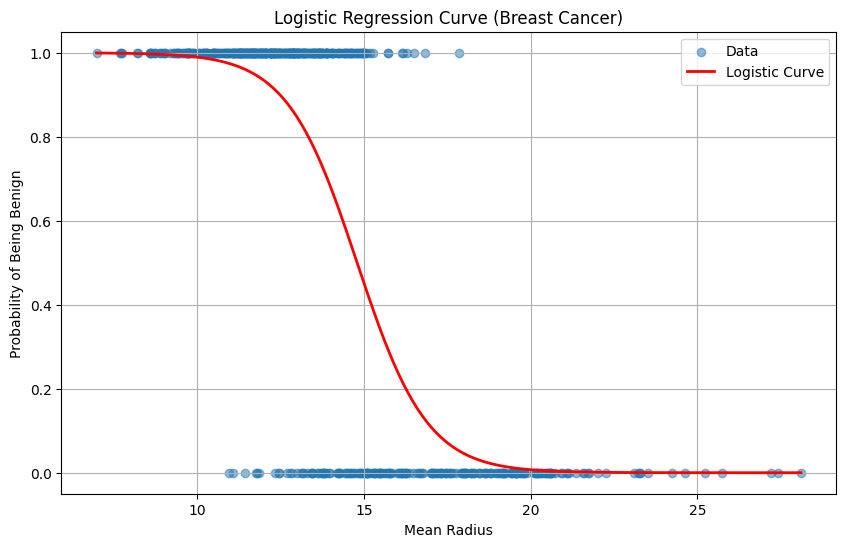

In [12]:
# 9. Logistic Regression Curve Visualization

# Create a range of mean radius values
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# Predict probability for class 1 (benign)
y_prob = model.predict_proba(X_range)[:, 1]

# Plot data and logistic curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data', alpha=0.5)
plt.plot(X_range, y_prob, color='red', linewidth=2, label='Logistic Curve')
plt.xlabel('Mean Radius')
plt.ylabel('Probability of Being Benign')
plt.title('Logistic Regression Curve (Breast Cancer)')
plt.legend()
plt.grid(True)
plt.show()